Useful Links used:
https://www.tensorflow.org/

https://keras.io/

https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce#:~:text=Embedding%20layer%20enables%20us%20to,way%20along%20with%20reduced%20dimensions.

https://www.analyticsvidhya.com/blog/2021/06/natural-language-processing-sentiment-analysis-using-lstm/

https://www.kaggle.com/code/lykin22/twitter-sentiment-analysis-with-naive-bayes-85-acc/notebook

https://www.analyticsvidhya.com/blog/2021/12/sentiment-analysis-on-tweets-with-lstm-for-beginners/

https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c

https://haochen23.github.io/2020/01/nlp-rnn-sentiment.html

https://www.analyticsvidhya.com/blog/2021/07/performing-sentiment-analysis-with-naive-bayes-classifier/

https://www.kaggle.com/code/prashant268/sentiment-analysis-lstm/notebook

https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce#:~:text=Embedding%20layer%20enables%20us%20to,way%20along%20with%20reduced%20dimensions

https://medium.com/@karyrs1506/sentiment-analysis-on-tweets-with-lstm-22e3bbf93a61

https://lifesaver.codes/answer/how-does-embedding-layer-work-3110

https://www.kaggle.com/code/prashant268/sentiment-analysis-lstm/notebook

https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-11-cnn-word2vec-41f5e28eda74

https://www.kaggle.com/code/arrogantlymodest/randomised-cv-search-over-keras-neural-network/notebook

https://www.analyticsvidhya.com/blog/2021/11/an-introduction-to-stemming-in-natural-language-processing/

In [ ]:
#####CODE BLOCK 1
import pandas as pd
pd.set_option('display.max_columns', 10)

In [ ]:
#####CODE BLOCK 2
# Connect to Google Drive if needed
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks


In [ ]:
#####CODE BLOCK 3
#I downloaded the CSV and called it sentiment.csv in my google drive folder called colab notebooks because the file was too large
data_train_df = pd.read_csv('./sentiment.csv', encoding='latin-1', names=["target", "id", "date", "flag", "user", "text"])

data_train_df.drop('id', axis=1, inplace=True)
data_train_df.drop('date', axis=1, inplace=True)
data_train_df.drop('flag', axis=1, inplace=True)
data_train_df.drop('user', axis=1, inplace=True)

In [ ]:
#####CODE BLOCK 4
# Import necessary Libraries for preprocessing
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
print(data_train_df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
   target                                               text
0       0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1       0  is upset that he can't update his Facebook by ...
2       0  @Kenichan I dived many times for the ball. Man...
3       0    my whole body feels itchy and like its on fire 
4       0  @nationwideclass no, it's not behaving at all....


In [ ]:
#####CODE BLOCK 5
#CODE CITATION ACKNOWLEDGMENT: https://medium.com/@karyrs1506/sentiment-analysis-on-tweets-with-lstm-22e3bbf93a61
from nltk.tokenize import TweetTokenizer
from nltk.stem import SnowballStemmer
snowball = SnowballStemmer(language='english')
tokenizer = TweetTokenizer(preserve_case=False,
                           strip_handles=True,
                           reduce_len=True)
import re
#Extract all the tweets from the dataframe
texts = list(data_train_df.loc[:, "text"])

#Prepare a list of tweets which have been cleaned
tweet_list = []
i = 0
stopwords_english = stopwords.words('english')

#Loop through every tweet
while i < len(texts):
  tweet = texts[i]
  #Remove hyperlinks and @'s
  tweet = re.sub('@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+',' ', tweet)
  no_punc_tweet = ""
  list_chars = []
  clean_tweet = []

  #Tokenzie the tweet after removing unecessary details in the tweet
  tweet_tokens = tokenizer.tokenize(tweet)
  #Loop through every token in the tweet making sure to remove stop words and punctuation
  for word in tweet_tokens:
    if word not in stopwords_english and word not in string.punctuation:
      #Get the stem of a word to avoid duplicates
      word = snowball.stem(word)
      clean_tweet.append(word)

  #Rejoin the words together
  no_punc_tweet = ' '.join(clean_tweet)
  no_punc_tweet = no_punc_tweet.lower()
  #Add it to our list of clean tweets
  tweet_list.append(no_punc_tweet)

  i += 1

#Create a new dataframe with cleaned tweets
data_train_df['refined'] = tweet_list




In [ ]:
#####CODE BLOCK 6
from statistics import mean
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
#Create a Keras tokenizer
tokenizer = Tokenizer()
print(tweet_list[0])
#Create an vocabulary dictionary from all the words in tweets
tokenizer.fit_on_texts(tweet_list)
#Transfers each word in a tweet to a sequence of integers represented by the dictionary we created before
X = tokenizer.texts_to_sequences(tweet_list)
#We don't have very large tweets. We can usually determine the sentiment in the first few words
X = pad_sequences(X, maxlen = 15, truncating = 'post', padding= 'post')
#We want to set our word embedding_length this will change based on if you use Glove or Word2Vec
embedding_len = len(tokenizer.word_index) + 1

awww bummer shoulda got david carr third day


In [ ]:
# CODE CITATION ACKNOWLEDGEMENT: https://www.kaggle.com/code/prashant268/sentiment-analysis-lstm/notebook
#####CODE BLOCK 7
#Use this code block for word embedding using the W2V embedding
documents = [tweet.split() for tweet in tweet_list]
embedding_len = 300000
import gensim
import numpy as np
#Train the w2v model
word_vector_model = gensim.models.word2vec.Word2Vec(documents,
                                            size=100,
                                            min_count=10,
                                            workers=8)


#Creating an embeddings matrix and fill it up based on the word vectors we created from before
embeddings_matrix = np.zeros((embedding_len, 100))
for word, i in tokenizer.word_index.items():
  if word in word_vector_model.wv:
    embeddings_matrix[i] = word_vector_model.wv[word]
print(embeddings_matrix.shape)

(300000, 100)


In [ ]:
#CODE CITATION ACKNOWLEDGEMENT https://jovian.ai/kamilpolak/sentiment-analysis-with-glove-and-lstm-a3c64
#https://www.kaggle.com/datasets/danielwillgeorge/glove6b100dtxt Obtain the glove file from here
#####CODE BLOCK 8
#Use this code block if you want to use Glove embedding
import numpy as np
embeddings_index = {}

with open('./glove.6B.100d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

embeddings_matrix = np.zeros((embedding_len, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector

In [ ]:
#####CODE BLOCK 9
from keras.models import Sequential
import json
from keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional
import tensorflow as tf
import os

'''
CODE SPEED UP: The following helps us run our code on multiple GPUS to speed up code execution
'''
strategy = tf.distribute.MirroredStrategy()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


In [ ]:
#####CODE BLOCK 10
#CODE CITATION ACKNOWLEDGEMENTS USED THE FOLLOWING LINKS FOR HELP
#https://jzhao326.github.io/documents/479_DL_REPORT.pdf
#https://towardsdatascience.com/choosing-the-right-hyperparameters-for-a-simple-lstm-using-keras-f8e9ed76f046
#https://www.analyticsvidhya.com/blog/2021/06/tuning-hyperparameters-of-an-artificial-neural-network-leveraging-keras-tuner/

#PREVIOUS WORK
#https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9362853
#https://www.kaggle.com/code/gemyhamed/sentiment-analysis-word-embedding-lstm-cnn/notebook
from keras.callbacks import EarlyStopping
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder

Y = data_train_df['target'].tolist()
# create a label encoder
encoder = LabelEncoder()
# Transform the binary data to a set of 0's and 1's
encoder.fit(Y)
Y = encoder.transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
# reshape y_train and y_test data
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)
x_val = X_train[-10000:]
y_val = Y_train[-10000:]

In [ ]:
#####CODE BLOCK 11
#This is the code we will use for Random Search. We must create a model for it
# CODE CITATION ACKNOWLEDGEMENT https://www.kaggle.com/code/arrogantlymodest/randomised-cv-search-over-keras-neural-network/notebook
'''
CODE SPEED UP: Using random search rather than grid search to find optimum parameters and using mirrored strategy
'''
!pip install keras-tuner
from tensorflow import keras
import keras_tuner as kt
def modelBuilder(hp):
  with strategy.scope():
    model = Sequential()
    LSTMLayer = hp.Choice('units1', values=[200, 120, 100])
    DenseLayer1 = hp.Choice('units2', values=[64, 48, 32])
    lr = hp.Choice('learning_rate', values=[0.01, 0.1, 0.001])
    optimizer=keras.optimizers.Adam(learning_rate=lr)
    model.add(Embedding(embedding_len, 100, input_length = 15, weights=[embeddings_matrix]))
    model.add(Dropout(0.2))
    model.add(LSTM(LSTMLayer, dropout = 0.2, return_sequences=True))
    model.add(LSTM(LSTMLayer, dropout = 0.2))
    model.add(Dense(DenseLayer1, activation='relu'))
    model.add(Dense(1, activation = "sigmoid"))
    model.compile(loss = 'binary_crossentropy', optimizer=optimizer, metrics = ['accuracy'])
    return model

In [ ]:
#####CODE BLOCK 12
#If you want to run random search
'''
CODE SPEED UP: Using random search rather than grid search to find optimum parameters
'''
batch_size=512
tuner = kt.RandomSearch(
    modelBuilder,
    objective='accuracy',
    max_trials=4,
    overwrite=True)
earlystop = EarlyStopping(monitor='val_accuracy', min_delta = 0.003, patience=1)
tuner.search(X_train, Y_train, epochs = 2, batch_size = batch_size, callbacks=[earlystop], validation_data=(x_val, y_val))

In [ ]:
#####CODE BLOCK 13
#This is where we build the model for evaluation
from keras.layers import Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D, Bidirectional,GlobalMaxPool1D
from keras.models import Model
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import Adadelta, Adam
with strategy.scope():
  optimizer = Adam(learning_rate = 0.001)
  model = Sequential()
  model.add(Embedding(embedding_len, 100, input_length = 15, weights=[embeddings_matrix]))
  model.add(Dropout(0.2))
  model.add(LSTM(200, dropout = 0.2, return_sequences=True))
  model.add(LSTM(200, dropout = 0.2))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation = "sigmoid"))
  model.compile(loss = 'binary_crossentropy', optimizer=optimizer, metrics = ['accuracy', Precision(), Recall()])
print(model.summary())

In [ ]:
#####CODE BLOCK 14
#If you want to actually run the model
'''
CODE SPEED UP: Large Batch Size increases the training time of each epoch
Also early stopping condition makes sure that the model doesn't overfit
'''
batch_size=512
earlystop = EarlyStopping(monitor='val_accuracy', min_delta = 0.003, patience=1)
history = model.fit(X_train, Y_train, epochs = 5, batch_size=batch_size, validation_split=0.1, verbose = 1, callbacks=[earlystop])

In [ ]:
model.save("./modelLSTM.h5")

In [ ]:
#Training data recroded
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
#1157 seconds

epochs=range(len(accuracy))

In [ ]:
#Obtain Precision and Recall
scores = model.evaluate(x=X_test, y=Y_test)

In [ ]:
print(model.summary())

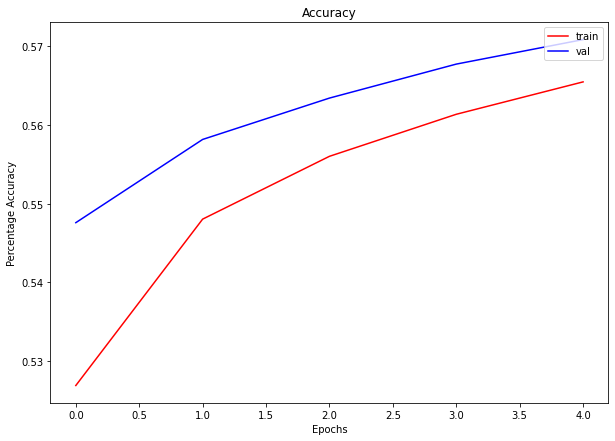

In [ ]:
#Plotting accuracy an val_accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.title("Accuracy")

plt.plot(epochs, accuracy, 'r')
plt.plot(epochs, val_accuracy, 'b')
plt.xlabel("Epochs")
plt.ylabel("Percentage Accuracy")
plt.legend(['train', 'val'], loc='upper right')


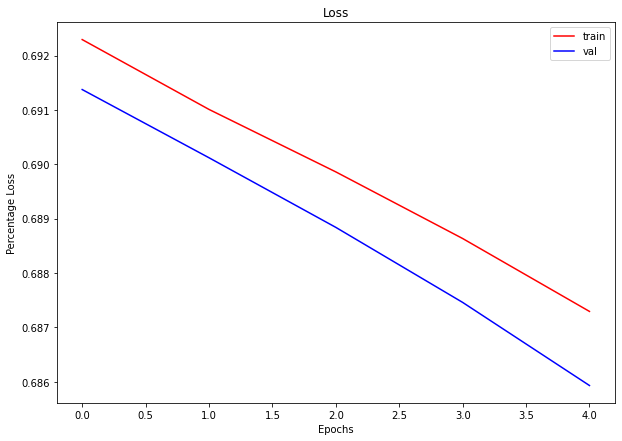

In [ ]:
#Plotting the val loss and loss
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.title("Loss")

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.xlabel("Epochs")
plt.ylabel("Percentage Loss")
plt.legend(['train', 'val'], loc='upper right')

<BarContainer object of 4 artists>

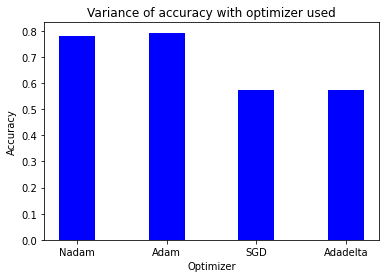

In [ ]:
#Accuracy change with optimizer
optimizers = ['Nadam', 'Adam', 'SGD', 'Adadelta']
accuracy = [0.7802, 0.793, 0.5726, 0.5718]
plt.xlabel("Optimizer")
plt.ylabel("Accuracy")
plt.title("Variance of accuracy with optimizer used")
plt.bar(optimizers, accuracy, color ='blue',
        width = 0.4)

<BarContainer object of 4 artists>

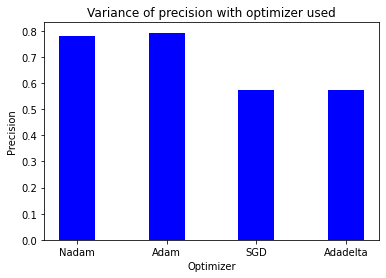

In [ ]:
#Precision with change of optimizer
optimizers = ['Nadam', 'Adam', 'SGD', 'Adadelta']
precision = [0.7922, 0.802, 0.5727, 0.5798]
plt.xlabel("Optimizer")
plt.ylabel("Precision")
plt.title("Variance of precision with optimizer used")
plt.bar(optimizers, accuracy, color ='blue',
        width = 0.4)

Text(0, 0.5, 'Accuracy')

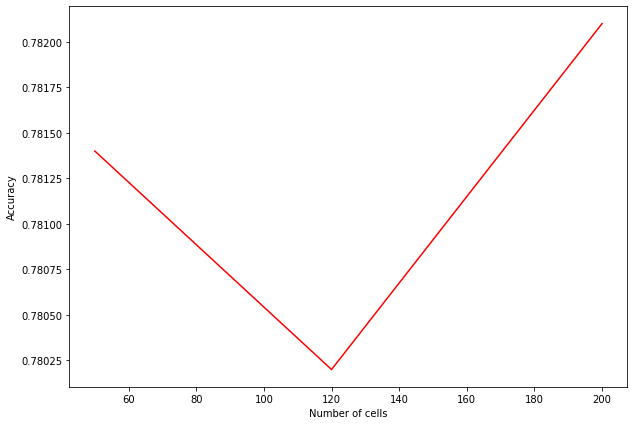

In [ ]:
#Accuracy as we change the number of cells
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
LSTM_layers = [50, 120, 200]
accuracy = [0.7814, 0.7802, 0.7821]
plt.plot(LSTM_layers, accuracy, 'r')
plt.xlabel("Number of cells")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

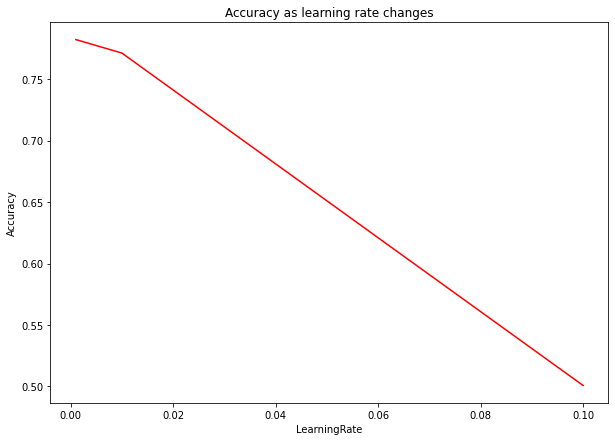

In [ ]:
#Accuracy with the change of learning rate
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
LearningRate = [0.1, 0.01, 0.001]
accuracy = [0.5008, 0.7711, 0.7821]
plt.title("Accuracy as learning rate changes")
plt.plot(LearningRate, accuracy, 'r')
plt.xlabel("LearningRate")
plt.ylabel("Accuracy")



In [ ]:
# CODE CITATION ACKNOWLEDGEMENT https://stackoverflow.com/questions/61684542/generating-confusion-matrix-for-keras-model-sentiment-analysis
# We want to use sklearn classification report so convert the values to 1's and 0's
from sklearn.metrics import confusion_matrix,classification_report
Y_pred = (model.predict(X_test).ravel()>0.5)+0
print(Y_test)

In [ ]:
#Classification Report of results
print(classification_report(Y_test, Y_pred))

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('LSTM.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/LSTM.ipynb to pdf
[NbConvertApp] Support files will be in LSTM_files/
[NbConvertApp] Making directory ./LSTM_files
[NbConvertApp] Making directory ./LSTM_files
[NbConvertApp] Making directory ./LSTM_files
[NbConvertApp] Making directory ./LSTM_files
[NbConvertApp] Making directory ./LSTM_files
[NbConvertApp] Making directory ./LSTM_files
[NbConvertApp] Writing 68569 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 153957 bytes to /content/drive/My Drive/LSTM.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'